In [1]:
import os
import numpy as np
from np import linalg as la
from np import random as rand
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

### Problem 1:

Consider the normal means problem with ε = 1. In class, we have proved that

<center>
    $
    \begin{equation}
    r(\hat{\mu}^{JS}, \mu) = n - (n-2)^2\mathbb{E} \Vert{Y}\Vert^{-2}
    \end{equation}
    $
</center>

where $\hat{\mu}^{JS}$ is the James–Stein estimator. Argue that the risk of the James–Stein estimator
depends only on $\Vert \mu \Vert$. Make a plot of the risk function with kµk for n = 10 and n = 80.
Compare this plot with a plot for the upper bound derived in the notes.

<center>
    $
    \begin{equation}
    r(\hat{\mu}^{JS}, \mu) \leq 2 + \frac{(n-2)\Vert \mu \Vert^2}{(n-2)+\Vert \mu \Vert^2}
    \end{equation}
    $
</center>

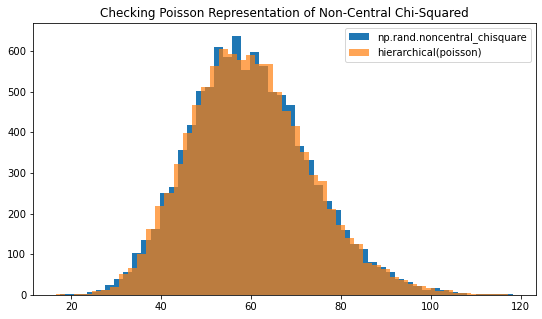

In [344]:
"""
Testing if hierarchical estimation of expectation 
of E[Y]**2 ~ non-central chi-squred is correct. 
"""

n_samples = 10000 # CLT
n = 30 # arbitrary
mu = np.ones(n) # arbitrary

def nonC_chi_0(n,mu):
    xi = la.norm(mu)**2
    return rand.noncentral_chisquare(n, xi)

def nonC_chi_1(n,mu):
    xi = la.norm(mu)**2
    poi = rand.poisson(xi/2)
    return rand.chisquare(n + 2*poi)

samples0 = [nonC_chi_0(n,mu) for i in range(n_samples)]
samples1 = [nonC_chi_1(n,mu) for i in range(n_samples)]

plt.figure(figsize = (9,5))
plt.hist(samples0, bins = 50)
plt.hist(samples1, bins = 50, alpha = .7)
plt.title('Checking Poisson Representation of Non-Central Chi-Squared')
plt.legend(['np.rand.noncentral_chisquare', 'hierarchical(poisson)'])
plt.show()

In [403]:
def upper_bound(n, mu):
    norm2 = la.norm(mu)**2
    return 2 + (n-2)*norm2/(n-2+norm2)

def nonC_chi(n, mu):
    xi = la.norm(mu)**2
    poi = rand.poisson(xi/2)
    return rand.chisquare(n + 2*poi)

def risk_func(n, mu):
    norm2 = la.norm(mu)**2
    Exp_nonC_chi = np.mean([n-2+2*rand.poisson(norm2/2) for i in range(10)])
    return n - (n-2)**2/Exp_nonC_chi

def q1_plot(n):
    mu_norm = np.linspace(0, 50, 100)
    risk = [risk_func(n, mu_i) for mu_i in mu_norm]
    upper = [upper_bound(n, mu_i) for mu_i in mu_norm]
    plt.figure(figsize = (7,5))
    plt.plot(mu_norm, risk, linewidth = 5)
    plt.plot(mu_norm, upper, linewidth = 5, alpha = .8)
    plt.title(f'James Stein Risk | n = {n}')
    plt.legend(['JS-risk', 'Upper Bound'], loc = 4)
    plt.show()
    print(f'risk(mu_JS, 0) = {risk[0]} <= {upper[0]} = Upper bound')

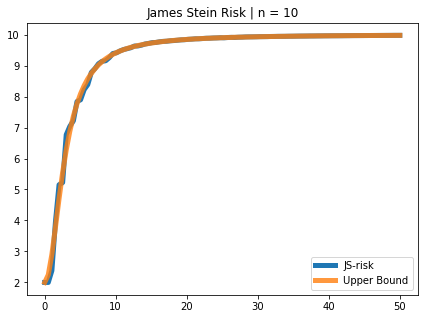

risk(mu_JS, 0) = 2.0 <= 2.0 = Upper bound


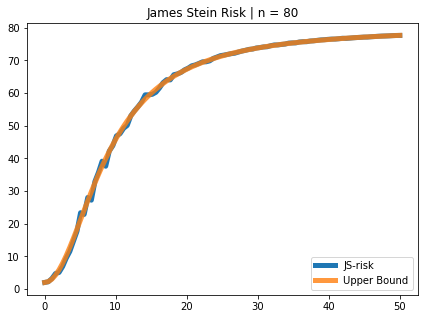

risk(mu_JS, 0) = 2.0 <= 2.0 = Upper bound


In [404]:
q1_plot(10)
q1_plot(80)

Note: I am not sure why the risk isn't STRICTLY bounded by the upper bound that we have derived for all $\Vert \mu \Vert$.

In the normal means problem we have the set of observations $Y \sim \mathcal{N}(\mu, \sigma^2\mathcal{I}_n)$. If we drew one sample from this distribution and asked what the best estimator for $\mu$ is, naively we would guess the true paramaters using the observations themselves.

Consider the risk of this estimator $\hat{\mu} = Y$ where $\sigma = 1$.

<center>
    \begin{equation}
    \begin{split}
        \mathbb{E}\Vert \hat{\mu} - Y\Vert^2 &= n + \mathbb{E}\Vert \hat{\mu} - \mu\Vert^2
        + 2\mathbb{E}(\hat{\mu}-\mu)^T(\mu-Y) \\
        &= n + \mathbb{E}\Vert \hat{\mu} - \mu\Vert^2 - 
        2\sum_{i=1}^{n}\mathbb{E}[\hat{\mu}_i(Y_i - \mu_i)],\;\; \text{because}\;\; \mu\mathbb{E}[(Y-\mu)] = 0
    \end{split}
    \end{equation}
</center>

and thus by James Stein multivariate lemma we have an unbiased estimate of the risk. In terms of the posed question, the risk is entirely data dependent i.e. does not include any population paramaters.

<center>
    \begin{equation}
        \hat{r}( \hat{\mu}, \mu) = \mathbb{E}\Vert \hat{\mu} - \mu\Vert^2 = \mathbb{E}\Vert \hat{\mu} - Y\Vert^2 + 2\sum_{i=1}^{n}\nabla_i \hat{\mu}_i - n
    \end{equation}
</center>

### Problem 2
Continuing from the previous problem. Show that the exact value of the risk and
the upper bound agree when $\Vert \mu \Vert = 0$.

I have already shown computationally the value of the risk and the upper bound are equal when $\Vert \mu \Vert = 0$. 

Analytically, notice that whenever $\Vert Y \Vert = 0$ this implies that we are in fact working with an inverse $\chi_n^2$, not a $\chi_n^2(\xi)$ distribution with respect to the risk function. Note that the expectation of an inverse Chi-Squared distribution only exists when $n > 2$ which is the exact condition for the James Stein estimator. 

<center>
    \begin{equation}
    \Vert Y \Vert = 0 \rightarrow \mathbb{E}\Vert Y \Vert^{-2} = (n-2)^{-1} 
    \end{equation}
</center>

Thus the risk function is equal to the upper bound.

<center>
    $
    \begin{equation}
    r(\hat{\mu}^{JS}, \mu) = n - (n-2)^2\mathbb{E} \Vert{Y}\Vert^{-2} = n-\frac{(n-2)^2}{n-2} = 2
    \end{equation}
    $
</center>

### Problem 3

The file baseball.rtf posted in ecampus contains baseball batting averages data
from the 1970 season for 19 major league players. The dataset shows each of 19 players’ batting
average after 45 at bats, as well as the season batting averages. The idea is to estimate the
season averages from the first 45 at bats. A snapshot of some of the relevant columns of the
data for 6 players is shown below. 

It is not unreasonable to work with the model hi ∼ Binomial(45, pi). If we make the variance
stabilizing transformation $y_i = \sqrt{45}sin^{-1}(2z_i-1)$ and $\mu_i = \sqrt{45}sin^{-1}(2p_i-1)$, then $y_i$ is approximately distributed as $\mathcal{N}(\mu_i, 1)$. Report and compare the MSE for the MLE estimator and the James Stein estimator.

In [351]:
path = os.getcwd() + '\hw1_data'
txt = open(path+'\\baseb.txt', 'r')
raw_data = txt.read().replace('\n', '').split(' ')
txt.close()

data = [raw_data[i:i+10] for i in range(0, len(raw_data)-10, 10)]
df = pd.DataFrame(data[1:], columns = data[0])
df[df.columns[2:]] = df[df.columns[2:]].astype('float64')
df.head()

,FirstName,LastName,At-Bats,Hits,BattingAverage,RemainingAt-Bats,RemainingAverage,SeasonAt-Bats,SeasonHits,SeasonAverage
0,Roberto,Clemente,45.0,18.0,0.400,367.0,0.3460,412.0,145.0,0.352
1,Frank,Robinson,45.0,17.0,0.378,426.0,0.2981,471.0,144.0,0.306
2,Frank,Howard,45.0,16.0,0.356,521.0,0.2764,566.0,160.0,0.283
3,Jay,Johnstone,45.0,15.0,0.333,275.0,0.2218,320.0,76.0,0.238
4,Ken,Berry,45.0,14.0,0.311,418.0,0.2727,463.0,128.0,0.276


In [352]:
def transform(x):
    return np.sqrt(45)*np.arcsin(2*x-1)

def invert_transform(x):
    return .5*(np.sin(x/np.sqrt(25)) + 1)

df['y'] = transform(df['BattingAverage'])
df['mu'] = transform(df['SeasonAverage'])
df['mu_hat'] = df['y'].mean()+(1-(len(df)-3)/la.norm(df['y'])**2)*(df['y']-df['y'].mean())

In [353]:
MSE_mle = la.norm(df['y']-df['mu'])**2
MSE_js = la.norm(df['y']-df['mu_hat'])**2

print(f"MSE-MLE = {MSE_mle}\nMSE-JS = {MSE_js}")

MSE-MLE = 13.711814484625835
MSE-JS = 0.09060119077120204


### Problem 4

In [354]:
from numpy import loadtxt

Y = loadtxt(path+'\\hw1_Y.txt')
X = loadtxt(path+'\\hw1_X.txt', delimiter=",")
true_beta = loadtxt(path+'\\hw1_truebeta.txt')

In [355]:
from sklearn.linear_model import Ridge, LinearRegression

lmbda_grid = np.arange(0, 2+0.01, 0.01)
estimates = []
MSPE = []
for lmbda in lmbda_grid:
    model = Ridge(alpha=lmbda, fit_intercept = False).fit(X, Y)
    beta_hat = model.coef_
    error = la.norm(X@beta_hat - X@true_beta)**2
    estimates.append(beta_hat)
    MSPE.append(error)

In [356]:
OLS_coeffs = LinearRegression(fit_intercept = False).fit(X,Y).coef_

# linear regression coeffs and model fitted with lmbda = 0 are the same, obviously
la.norm(OLS_coeffs - estimates[0])**2

2.913013080046369e-22

In [357]:
optimal_lmbda = lmbda_grid[MSPE.index(min(MSPE))]

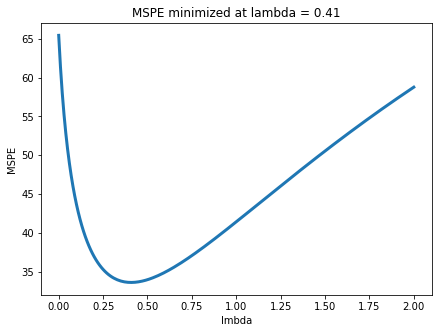

In [358]:
plt.figure(figsize = (7,5))
plt.plot(lmbda_grid, MSPE, linewidth = 3)
plt.xlabel('lmbda')
plt.ylabel('MSPE')
plt.title(f"MSPE minimized at lambda = {round(optimal_lmbda,4)}")
plt.show()

Notice that the MSPE is minimized when $\lambda \approx 0.4$. Thus by using shrinkage, we have found a model that has a lower risk than traditional OLS. 

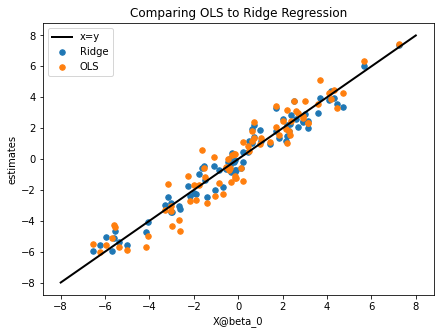

In [386]:
coeffs = estimates[40] # note that these are estimates when lmbda = .4

plt.figure(figsize = (7,5))
plt.scatter(X@true_beta, X@coeffs, s = 30)
plt.scatter(X@true_beta, X@OLS_coeffs, s = 30)
plt.plot(np.linspace(-8,8), np.linspace(-8,8), color = 'k', linewidth = 2)
plt.xlabel('X@beta_0')
plt.ylabel('estimates')
plt.title(f"Comparing OLS to Ridge Regression")
plt.legend(['x=y','Ridge', 'OLS'])
plt.show()